In [3]:
import pandas as pd

In [4]:
URL='https://drive.google.com/file/d/1xsLlG0OH31huDQmLrqaA2TQEGGUu1thl/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
df = pd.read_csv(path)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
X=df.iloc[ : , 2:4 ]
y=df.iloc[ : , 4 ]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.25, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()

In [9]:
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

In [23]:
from warnings import filterwarnings
filterwarnings('ignore')

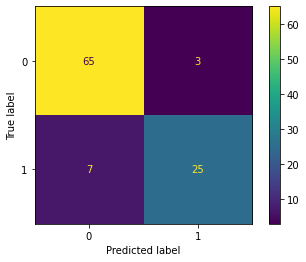

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test);

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [36]:
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,f1_score,precision_score,recall_score
for metric_name in [accuracy_score,log_loss,roc_auc_score,f1_score,precision_score,recall_score]:
    metric = metric_name(y_test, y_pred)
    display(f'{metric_name.__name__} - {metric}')


'accuracy_score - 0.9'

'log_loss - 3.453901627413975'

'roc_auc_score - 0.8685661764705882'

'f1_score - 0.8333333333333334'

'precision_score - 0.8928571428571429'

'recall_score - 0.78125'

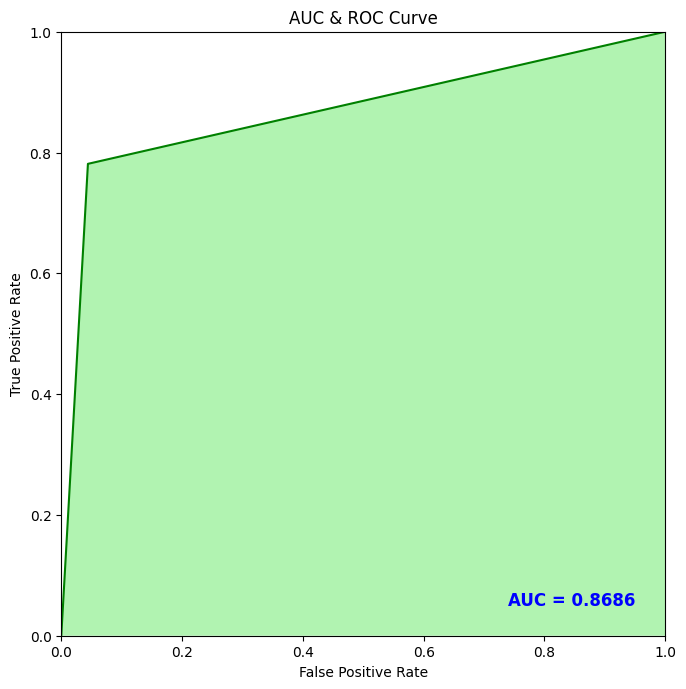

In [41]:
import sklearn.metrics 
auc = sklearn.metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = sklearn.metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()